<a href="https://colab.research.google.com/github/uiopqwertyu/esaa/blob/master/Apple_Stock_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [23]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2]:
apple = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")

### Step 4.  Check out the type of the columns

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [6]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [10]:
apple.index=apple['Date']
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2014-07-08,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [12]:
apple[apple.Date.duplicated() == 1]

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [15]:
apple=apple.reset_index(drop=True)
apple=apple.sort_values(by='Date')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day
0,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,12
1,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,15
2,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,16
3,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,17
4,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,18


### Step 9. Get the last business day of each month

In [16]:
apple['day'] = apple.Date.dt.day
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day
0,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,12
1,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,15
2,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,16
3,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,17
4,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,18


### Step 10.  What is the difference in days between the first day and the oldest

In [17]:
apple.Date.max() - apple.Date.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [22]:
apple['month'] = (apple.Date.dt.month)
apple.month.count()


8465

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

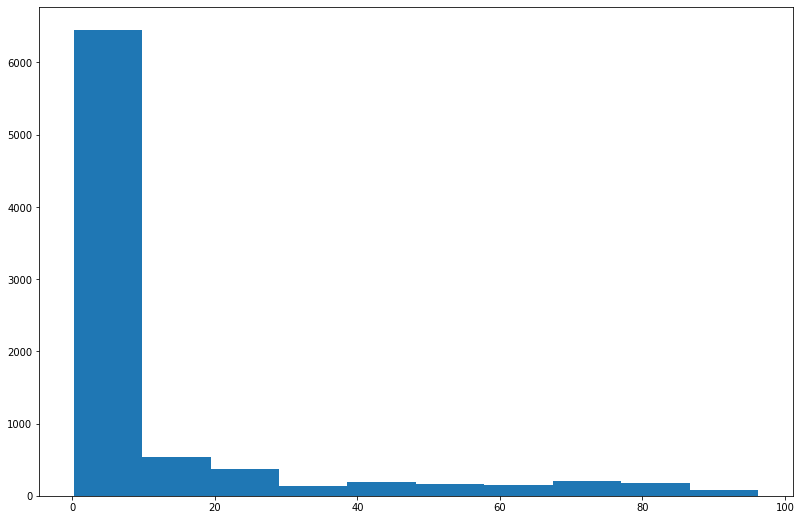

In [24]:
plt.figure(figsize=(13.5,9))
plt.hist(apple['Adj Close'])
plt.show()

### BONUS: Create your own question and answer it.